In [14]:
#Name: Olof Persson
#Homework 5
#Question 1 Part a
import pandas as pd
DF = pd.read_csv("train.csv")
median_DF = pd.read_csv("train.csv")
mean_DF = pd.read_csv("train.csv")
zero_DF = pd.read_csv("train.csv")
print(DF.describe())
print(DF.columns)
print(DF.isnull().sum())
print(DF.dtypes)

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  
Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
      

In [15]:
DF

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [16]:
median_DF["Fare"] = median_DF["Fare"].fillna(median_DF["Fare"].median())
median_DF["Age"] = median_DF["Age"].fillna(median_DF["Age"].median())
mean_DF["Fare"] = mean_DF["Fare"].fillna(mean_DF["Fare"].mean())
mean_DF["Age"] = mean_DF["Age"].fillna(mean_DF["Age"].mean())
zero_DF["Fare"] = zero_DF["Fare"].fillna(0)
zero_DF["Age"] = zero_DF["Age"].fillna(0)
print("Fill Nulls with Medians mean: ",median_DF["Fare"].mean(), "median: ",median_DF["Fare"].median())
print("No Nulls: ",DF["Fare"].mean(), "median: ",DF["Fare"].median())
print("Fill Nulls with Means: ",mean_DF["Fare"].mean(), "median: ",mean_DF["Fare"].median())
print("Fill Nulls with Zeros: ",zero_DF["Fare"].mean(), "median: ",zero_DF["Fare"].median())

Fill Nulls with Medians mean:  32.2042079685746 median:  14.4542
No Nulls:  32.2042079685746 median:  14.4542
Fill Nulls with Means:  32.2042079685746 median:  14.4542
Fill Nulls with Zeros:  32.2042079685746 median:  14.4542


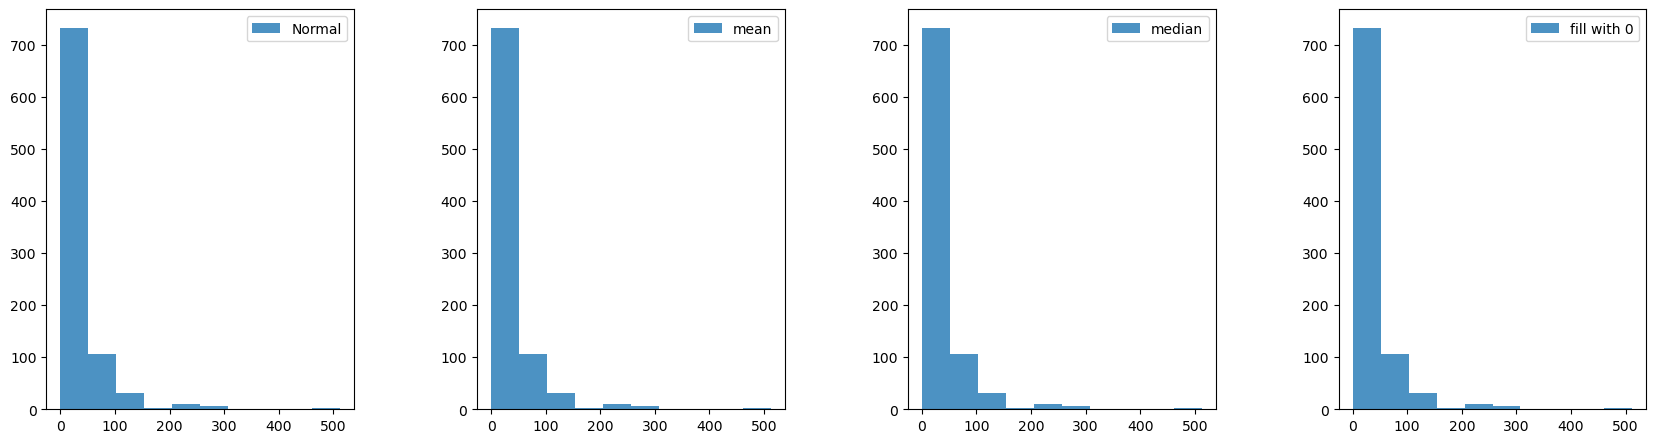

In [17]:
import matplotlib.pyplot as plt
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,5))
for x,ax,la in zip([DF['Fare'],mean_DF['Fare'],median_DF['Fare'],zero_DF['Fare']],[ax1,ax2,ax3,ax4],['Normal','mean','median','fill with 0']):
    ax.hist(x,alpha=0.8,label=la)
    ax.legend()
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=0.9,wspace=0.4,hspace=0.4)
plt.show()

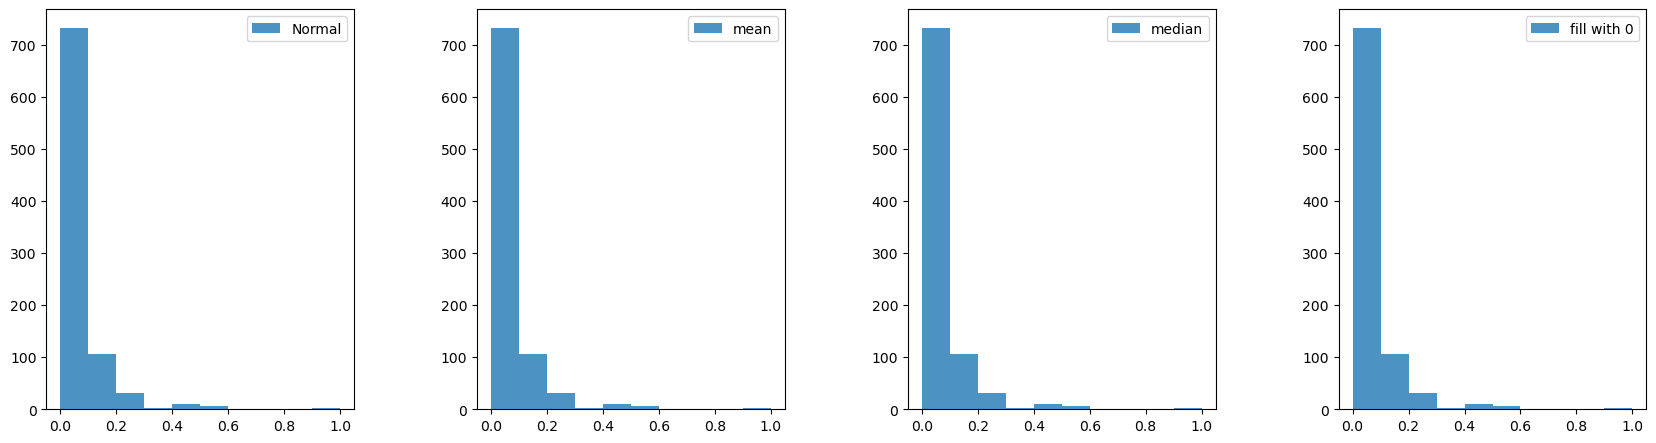

In [18]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
scaler = MinMaxScaler()
X0 = scaler.fit_transform(np.array(DF['Fare']).reshape(-1,1))
X1 = scaler.fit_transform(np.array(mean_DF['Fare']).reshape(-1,1))
X2 = scaler.fit_transform(np.array(median_DF['Fare']).reshape(-1,1))
X3 = scaler.fit_transform(np.array(zero_DF['Fare']).reshape(-1,1))
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(20,5))
for x,ax,la in zip([X0,X1,X2,X3],[ax1,ax2,ax3,ax4],['Normal','mean','median','fill with 0']):
    ax.hist(x,alpha=0.8,label=la)
    ax.legend()
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=0.9,wspace=0.4,hspace=0.4)
plt.show()


In [19]:
#Question 2 Part a
class Node:
    def __init__(self):
        
        # links to the left and right child nodes
        self.right = None
        self.left = None
        # derived from splitting criteria
        self.column = None
        self.threshold = None
        # probability for object inside the Node to belong for each of the given classes
        self.probas = None
        # depth of the given node
        self.depth = None
        # if it is the root Node or not
        self.is_terminal = False
class DecisionTree1:
    def __init__(self, max_depth = 3, min_samples_leaf = 1, min_samples_split = 2):
        
        self.max_depth = max_depth
        self.min_samples_leaf = min_samples_leaf
        self.min_samples_split = min_samples_split
        self.classes = None
        self.Tree = None
    
    def nodeProbas(self, y):
        # Calculates probability of class in a given node
        probas = []
        for one_class in self.classes:
            proba = y[y == one_class].shape[0] / y.shape[0]
            probas.append(proba)
        return np.asarray(probas)

    def gini(self, probas):
        # Calculates gini criterion for the given node
        return 1 - np.sum(probas**2)
    
    def calcImpurity(self, y):
        # Wrapper for the impurity calculation. Calculates probability first and then passses them
        # to the Gini criterion
        return self.gini(self.nodeProbas(y))
    
    def calcBestSplit(self, X, y):
        # Calculates the best possible split for the concrete node of the tree
        bestSplitCol = None
        bestThresh = None
        bestInfoGain = -999
        
        impurityBefore = self.calcImpurity(y)

        for col in range(X.shape[1]):
            x_col = X[:, col]
            for x_i in x_col:
                threshold = x_i
                y_right = y[x_col > threshold]
                y_left = y[x_col <= threshold]
                
                if y_right.shape[0] == 0 or y_left.shape[0] == 0:
                    continue
                    
                impurityRight = self.calcImpurity(y_right)
                impurityLeft = self.calcImpurity(y_left)
                infoGain = impurityBefore
                infoGain -= (impurityLeft * y_left.shape[0] / y.shape[0]) + (impurityRight * y_right.shape[0] / y.shape[0])
                
                if infoGain > bestInfoGain:
                    bestSplitCol = col
                    bestThresh = threshold
                    bestInfoGain = infoGain
        # if we still didn't find the split
        if bestInfoGain == -999:
            return None, None, None, None, None, None
        
        x_col = X[:, bestSplitCol]
        x_left, x_right = X[x_col <= bestThresh, :], X[x_col > bestThresh, :]
        y_left, y_right = y[x_col <= bestThresh], y[x_col > bestThresh]
        return bestSplitCol, bestThresh, x_left, y_left, x_right, y_right
                
    def buildDT(self, X, y, node):
        # Recursively builds decision tree from the top to bottom
        if node.depth >= self.max_depth:
            node.is_terminal = True
            return
        if X.shape[0] < self.min_samples_split:
            node.is_terminal = True
            return
        if np.unique(y).shape[0] == 1:
            node.is_terminal = True
            return
        # calculating current split
        splitCol, thresh, x_left, y_left, x_right, y_right = self.calcBestSplit(X, y)
        
        if splitCol is None:
            node.is_terminal = True
            
        if x_left.shape[0] < self.min_samples_leaf or x_right.shape[0] < self.min_samples_leaf:
            node.is_terminal = True
            return
        
        node.column = splitCol
        node.threshold = thresh
        node.left = Node()
        node.left.depth = node.depth + 1
        node.left.probas = self.nodeProbas(y_left)
        
        node.right = Node()
        node.right.depth = node.depth + 1
        node.right.probas = self.nodeProbas(y_right)
        
        self.buildDT(x_right, y_right, node.right)
        self.buildDT(x_left, y_left, node.left)

    def fit(self, X, y):
        # Standard fit function to run all the model training
        if type(X) == pd.DataFrame:
            X = np.asarray(X)
        self.classes = np.unique(y)
        self.Tree = Node()
        self.Tree.depth = 1
        self.Tree.probas = self.nodeProbas(y)
        self.buildDT(X, y, self.Tree)
    
    def predictSample(self, x, node):
        # Passes one object through decision tree and return the probability of it to belong to each class
        if node.is_terminal:
            return node.probas
        if x[node.column] > node.threshold:
            probas = self.predictSample(x, node.right)
        else:
            probas = self.predictSample(x, node.left) 
        return probas

    def predict(self, X):
        # Returns the labels for each X
        if type(X) == pd.DataFrame:
            X = np.asarray(X)   
        predictions = []
        for x in X:
            pred = np.argmax(self.predictSample(x, self.Tree))
            predictions.append(pred)
        return np.asarray(predictions)

In [20]:
DF.drop(['Name','Ticket','Cabin','Embarked','Sex'],axis=1,inplace=True)

In [21]:
DF.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
dtype: object

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
DF['Age'] = DF['Age'].fillna(DF['Age'].median())
X = DF.drop('Survived', axis=1).to_numpy()
y = DF['Survived'].to_numpy()
#Question 1 Part b
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
model = DecisionTree1(max_depth = 10, min_samples_leaf=2, min_samples_split=2)
model.fit(X_train, y_train)
#Question 2 Part b
from sklearn.metrics import accuracy_score
y_pred = model.predict(X_test)
print('Accuracy for self built model', accuracy_score(y_test, y_pred))
dt = DecisionTreeClassifier(max_depth = 10, min_samples_leaf=2, min_samples_split=2)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print('Accuracy for sklearn model',accuracy_score(y_test, y_pred))



Accuracy for self built model 0.6927374301675978
Accuracy for sklearn model 0.6703910614525139


In [ ]:
#Questino 2 Part c
#It looks as thought the the accuracy of the self made decision tree above is around 69% which isn't too bad 
#becuase it is actually better than the sklearn model with the same parameters. So while it is not the best model, it could be 
#used for relatively good approximations of the true survival rate of a given passenger. 

In [38]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
#Question 3 Part a 
def compute_error(y, y_pred, w_i):
    # Calculate the weighted error of the current weak classifier.
    # Returns:
    # float, the weighted error of the current weak classifier
    error = np.sum(w_i * (y_pred != y)) / np.sum(w_i)
    return error

def compute_alpha(error):
    # Calculate the weight of the current weak classifier.
    # Returns:
    # float, the weight of the current weak classifier
    alpha = 0.5 * np.log((1 - error) / error)
    return alpha

def update_weights(w_i, alpha, y_pred, y):
    # Update the weights of the data points based on the performance of the current weak classifier.
    # Returns:
    # array-like, updated weights of the data
    new_w_i = w_i * np.exp(-alpha * y * y_pred)
    return new_w_i / np.sum(new_w_i)

def AdaBoost(X, y, M):
    n = len(X)
    w_i = np.ones(n) / n
    classifiers = []
    
    for m in range(M):
        h = DecisionTreeClassifier(max_depth=1)
        h.fit(X, y, sample_weight=w_i)
        y_pred = h.predict(X)
        
        error = compute_error(y, y_pred, w_i)
        alpha = compute_alpha(error)
        w_i = update_weights(w_i, alpha, y_pred, y)
        
        classifiers.append((h, alpha))
    
    return classifiers

def predict(classifiers, X):
    # Predict the labels of the data using the trained AdaBoost model.
    # Returns:
    # array-like, predicted labels of the data (-1 or 1)
    y_pred = np.zeros(len(X))
    for h, alpha in classifiers:
        y_pred += alpha * h.predict(X)
    return np.sign(y_pred)


Best accuracy on test set: 0.6815642458100558
Number of weak classifiers in best accuracy: 2


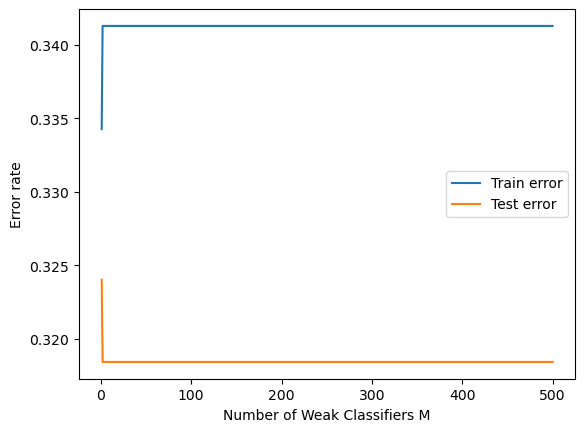

In [43]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

train_errors = []
test_errors = []
M_values = range(1, 501)
best_accuracy = 0.0
best_classifiers = None
#Question 3 Part b
for M in M_values:
    classifiers = AdaBoost(X_train, y_train, M)
    y_train_pred = predict(classifiers, X_train)
    y_test_pred = predict(classifiers, X_test)
    
    # Calculate errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

    accuracy = accuracy_score(y_test, y_test_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifiers = classifiers
#Question 3 Part c
print('Best accuracy on test set:', best_accuracy)
print('Number of weak classifiers in best accuracy:', len(best_classifiers))

plt.plot(M_values, train_errors, label='Train error')
plt.plot(M_values, test_errors, label='Test error')
plt.xlabel('Number of Weak Classifiers M')
plt.ylabel('Error rate')
plt.legend()
plt.show()


Best accuracy on test set: 0.7653631284916201
Number of weak classifiers in best accuracy: 500


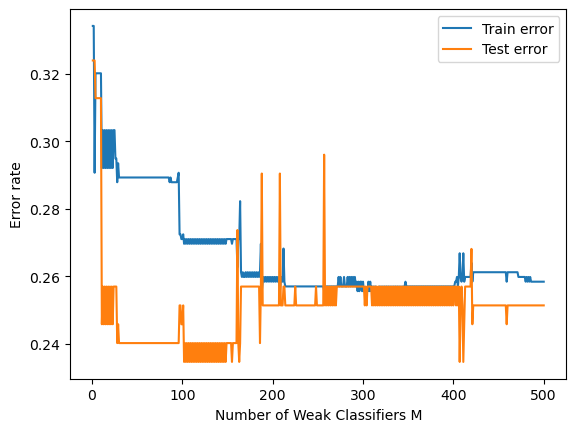

In [45]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
train_errors = []
test_errors = []
M_values = range(1, 501)
best_accuracy = 0.0
best_classifiers = None
for M in M_values:
    ada = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), n_estimators=M, algorithm="SAMME")
    ada.fit(X_train, y_train)
    y_train_pred = ada.predict(X_train)
    y_test_pred = ada.predict(X_test)
    
    # Calculate errors
    train_error = 1 - accuracy_score(y_train, y_train_pred)
    test_error = 1 - accuracy_score(y_test, y_test_pred)
    train_errors.append(train_error)
    test_errors.append(test_error)

    accuracy = accuracy_score(y_test, y_test_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_classifiers = classifiers

print('Best accuracy on test set:', best_accuracy)
print('Number of weak classifiers in best accuracy:', len(best_classifiers))
plt.plot(M_values, train_errors, label='Train error')
plt.plot(M_values, test_errors, label='Test error')
plt.xlabel('Number of Weak Classifiers M')
plt.ylabel('Error rate')
plt.legend()
plt.show()


In [ ]:
#Question 3 Part d
#The above self made Adaboost algorithm has a decent level of accuracy with the best accuracy around 68%, but the accuracy does not 
#seem to improve at all after the 2 weak classifiers round all the way up to 500 classifiers and the error rate isn't minimal
#even if the accuracy is decent. This is compared to the sklearn model which has a much higher accuracy of around 76% and the 
#number of weak classifiers that has the highest accuracy is the 500th round or the last round meaning that the sklearn model
#is improving the accuracy of the model with each round. The sklearn model also has a much lower error rate than the self made
#model. The sklearn model is definitely better than the self made model.